# 四、 Gibbs采样
+ M-H采样已经可以很好的解决蒙特卡罗方法需要的任意概率分布的样本集的问题。但是M-H采样有两个缺点：一是需要计算接受率，在高维时计算量大。并且由于接受率的原因导致算法收敛时间变长。二是有些高维数据，特征的条件概率分布好求，但是特征的联合分布不好求。因此需要一个好的方法来改进M-H采样，这就是我们下面讲到的Gibbs采样。

## 1. 重新寻找合适的细致平稳条件
+ 如果非周期马尔科夫链的状态转移矩阵𝑃和概率分布𝜋(𝑥)对于所有的𝑖,𝑗满足：
$$\pi(i)P(i,j)=\pi(j)P(j,i) \tag{1}$$
+ 则称概率分布𝜋(𝑥)是状态转移矩阵𝑃的平稳分布。

+ 在M-H采样中我们通过引入接受率使细致平稳条件满足。现在我们换一个思路。
+ 从二维的数据分布开始，假设$\pi(x,y)$是一个二维联合数据分布，观察第一个特征维度相同的两个点$A(x_1,y_1)$和$B(x_1,y_2)$，容易发现下面两式成立：
<div align="center"> <img src="media/mc4.png" width="80%" /> </div>

$$\pi(A)=\pi(x_1,y_1)=\pi(x_1)\pi(y_1|x_1) \tag{2}$$
$$\pi(B)=\pi(x_1,y_2)=\pi(x_1)\pi(y_2|x_1) \tag{3}$$
+ 对上边两式同时乘以一个式子：
$$\pi(A)\pi(y_2|x_1)=\pi(x_1,y_1)=\pi(x_1)\pi(y_1|x_1)\pi(y_2|x_1) \tag{4}$$
$$\pi(B)\pi(y_1|x_1)=\pi(x_1,y_2)=\pi(x_1)\pi(y_2|x_1)\pi(y_1|x_1) \tag{5}$$
+ (4)(5)两式右边是相等的，所以：
$$\pi(A)\pi(y_2|x_1)=\pi(B)\pi(y_1|x_1) \tag{6}$$

+ 即：
$$\pi(A)P(A \to B)=\pi(B)P(B \to A) \tag{7}$$
+ 可以看到，上式已经满足了细致平稳条件：
+ 在$x=x_1$这条直线上，如果用条件概率分布$\pi(y_2|x_1)$作为马尔科夫链的状态转移概率，则任意两个点之间的转移满足细致平稳条件！这真是一个开心的发现，同样的道理，在在$y=y_1$这条直线上，如果用条件概率分布$\pi(x_1|y_1)$作为马尔科夫链的状态转移概率，则任意两个点之间的转移也满足细致平稳条件。那是因为假如有一点$C(x_2,y_1)$,我们可以得到:
$$\pi(A)\pi(x_2|y_1)=\pi(C)\pi(x_1|y_1) \tag{8}$$

+ 即：
$$\pi(A)P(A \to C) =\pi(C)P(C \to A) \tag{9}$$

+ 基于上面的发现，我们可以这样构造分布$\pi(x,y)$的马尔可夫链对应的状态转移矩阵𝑃：
$$P(A \to B)=\pi(y_2|x_1) \quad if \quad x_1^{(A)} = x_1^{(B)} = x_1 \tag{10}$$
$$P(A \to C)=\pi(x_2|y_1) \quad if \quad y_1^{(A)} = y_1^{(C)} = y_1 \tag{11}$$
$$P(A \to D)=0 \quad else \quad \tag{12}$$


+ 有了上面这个状态转移矩阵，我们很容易验证二维平面上的任意沿坐标轴方向的两点𝐸,𝐹，满足细致平稳条件时：
$$\pi(E)P(E \to F)=\pi(F)P(F \to E) \tag{13}$$
+ 于是这个二维空间上的马氏链将收敛到平稳分布𝜋(𝑥,𝑦)


## 2. 二维Gibbs抽样

+ 利用上一节找到的状态转移矩阵，我们就得到了二维Gibbs采样，这个采样需要两个维度之间的条件概率。具体过程如下：
+ 1、输入平稳分布$\pi(x,y)$，设定状态转移次数阈值$n_1$，需要的样本个数$n_2$;
+ 2、随机初始化初始状态值$(x_0,y_0)$;
+ 3、for $t=0 \to n_1+n_2-1$: 
  + a. 从条件概率分布$P(y|x_t)$中采样得到样本$y_{t+1}$;
  + b. 从条件概率分布$P(x|y_{t+1})$中采样得到样本$x_{t+1}$
+ 样本集$\{(x_{n_1},y_{n_1}),(x_{n_1+1},y_{n_1+1}),\ldots,(x_{n_1+n_2-1},y_{n_1+n_2-1})\}$即为我们需要的平稳分布对应的样本集。
+ 整个采样过程中，我们通过轮换坐标轴，采样的过程为：
$$(x_1,y_1)\to(x_1,y_2)\to(x_2,y_2)\to \ldots \to(x_{n_1+n_2-1},y_{n_1+n_2-1}) \tag{14}$$
+ 用下图可以很直观的看出，采样是在两个坐标轴上不停的轮换的。当然，坐标轴轮换不是必须的，我们也可以每次随机选择一个坐标轴进行采样。不过常用的Gibbs采样的实现都是基于坐标轴轮换的。

<div align="center"> <img src="media/mc5.png" width="80%" /> </div>

## 3. 多维Gibbs采样

+ 上面的这个算法推广到多维的时候也是成立的。比如一个n维的概率分布$\pi(x_1,x_2,\ldots,x_n)$，我们可以通过在n个坐标轴上轮换采样，来得到新的样本。对于轮换到的任意一个坐标轴$x_i$上的转移，马尔科夫链的状态转移概率为$P(x_i|x_1,x_2,\ldots,x_{i-1},x_{i+1},\ldots,x_n)$，即固定𝑛−1个坐标轴，在某一个坐标轴上移动。
+ 具体的算法过程如下：
  + 1、输入平稳分布$\pi(x_1,x_2,\ldots,x_n)$或者对应的所有特征的条件概率分布，设定状态转移次数阈值$n_1$，需要的样本个数$n_2$;
  + 2、随机初始化初始状态值$(x_1^{(0)},x_2^{(0)},\ldots,x_n^{(0)})$;
  + 3、for $t=0\to n_1+n_2-1$: 
    + a. 从条件概率分布$P(x_1|x_2^{(t)},x_3^{(t)},x_4^{(t)},\ldots,x_n^{(t)})$中采样得到样本$x_1^{(t+1)}$;
    + b. 从条件概率分布$P(x_2|x_1^{(t+1)},x_3^{(t)},x_4^{(t)}\ldots,x_n^{(t)})$中采样得到样本$x_2^{(t+1)}$;
    + c. ...
    + d. 从条件概率分布$P(x_j|x_1^{(t+1)},x_2^{(t+1)},\ldots,x_{j-1}^{(t+1)},x_{j+1}^{(t)}\ldots,x_n^{(t)})$中采样得到样本$x_j^{(t+1)}$;
    + e. ...
    + f. 从条件概率分布𝑃$P(x_n|x_1^{(t+1)},x_2^{(t+1)},\ldots,x_{n-1}^{(t+1)})$中采样得到样本$x_n^{(t+1)}$;
+ 样本集$\{(x_1^{n_1},x_2^{n_1},\ldots,x_n^{n_1}),\ldots,(x_1^{n_1+n_2-1},x_2^{n_1+n_2-1},\ldots,x_n^{n_1+n_2-1}) \}$即为我们需要的平稳分布对应的样本集。
+ 整个采样过程和Lasso回归的坐标轴下降法算法非常类似，只不过Lasso回归是固定𝑛−1个特征，对某一个特征求极值。而Gibbs采样是固定𝑛−1个特征在某一个特征采样。
+ 同样的，轮换坐标轴不是必须的，我们可以随机选择某一个坐标轴进行状态转移，只不过常用的Gibbs采样的实现都是基于坐标轴轮换的。

## 4. 二维Gibbs采样实例

+ 假设二维正态分布$N(\mu,\Sigma)$，其中：
$$\mu=(\mu_1,\mu_2)=(5,-1) \tag{15}$$
$$\Sigma=\begin{pmatrix} \sigma_1^2 & \rho\sigma_1\sigma_2 \\
\rho\sigma_1\sigma_2 & \sigma_2^2 \end{pmatrix}=\begin{pmatrix} 1 & 1 \\ 1 & 4 \end{pmatrix} \tag{16}$$

+ 而采样过程中的状态转移条件分布为：
$$P(x|y)=N(\mu_1+\frac{\rho\sigma_1}{\sigma_2(y-\mu_2)},(1-\rho^2)\sigma_1^2) \tag{17}$$
$$P(y|x)=N(\mu_2+\frac{\rho\sigma_2}{\sigma_1(x-\mu_1)},(1-\rho^2)\sigma_2^2) \tag{18}$$
+ 具体代码如下：

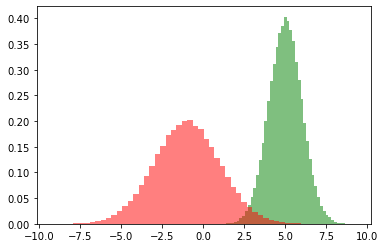

In [5]:
import random
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
sample_source=multivariate_normal(mean = [5,-1], cov=[[1,1],[1,4]])

def p_yifx(x, m1, m2, s1, s2):
    return (random.normalvariate(m2+rho*s2/s1*(x-m1),math.sqrt((1-rho**2)*(s2**2))))

def p_xify(y,m1,m2,s1,s2):
    return (random.normalvariate(m1+rho*s1/s2*(y-m2),math.sqrt((1-rho**2)*(s1**2))))

N = 5000
k = 20
x_res = []
y_res = []
z_res = []
m1 = 5
m2 = -1
s1 = 1
s2 = 2

rho = 0.5
y = m2

for i in range(N):
    for j in range(k):
        x = p_xify(y,m1,m2,s1,s2)
        y = p_yifx(x,m1,m2,s1,s2)
        z = sample_source.pdf([x,y])
        x_res.append(x)
        y_res.append(y)
        z_res.append(z)

plt.hist(x_res,50,density=1,color='green',alpha=0.5)
plt.hist(y_res,50,density=1,color='red',alpha=0.5)
plt.show()

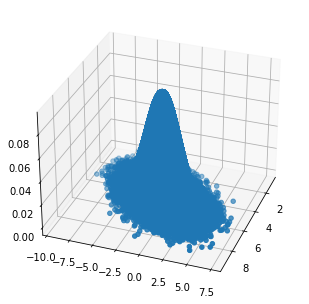

In [12]:
fig = plt.figure()
ax = Axes3D(fig,rect=[0,0,1,1],elev=30,azim=20,auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(x_res, y_res, z_res, marker='o')
plt.show()

## 5. Gibbs采样小结
+ 由于Gibbs采样在高维特征时的优势，目前我们通常意义上的MCMC采样都是用的Gibbs采样。当然Gibbs采样是从M-H采样的基础上的进化而来的，同时Gibbs采样要求数据至少有两个维度，一维概率分布的采样是没法用Gibbs采样的,这时M-H采样仍然成立。
+ 有了Gibbs采样来获取概率分布的样本集，有了蒙特卡罗方法来用样本集模拟求和，他们一起就奠定了MCMC算法在大数据时代高维数据模拟求和时的作用。MCMC系列就在这里结束吧。